# Time Series Analysis - ARIMA model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import statsmodels as sm

In [2]:
# cfg
T = 100000
sigma_eps = 0.2
theta = 5/6
mu = 1e-3

## Create WGN

In [3]:
# create WGN
wgn = np.random.normal(scale=sigma_eps, size=T)

In [4]:
# compute 1st and 2nd order
print(f"sample mean = {np.mean(wgn)}, sample std = {np.std(wgn)}")

sample mean = -0.0006517069030482882, sample std = 0.20024987109487777


(array([7.0000e+00, 1.0500e+02, 1.7140e+03, 1.1584e+04, 3.1342e+04,
        3.5455e+04, 1.6374e+04, 3.2000e+03, 2.1100e+02, 8.0000e+00]),
 array([-1.00677555, -0.81078141, -0.61478727, -0.41879313, -0.22279898,
        -0.02680484,  0.1691893 ,  0.36518344,  0.56117759,  0.75717173,
         0.95316587]),
 <BarContainer object of 10 artists>)

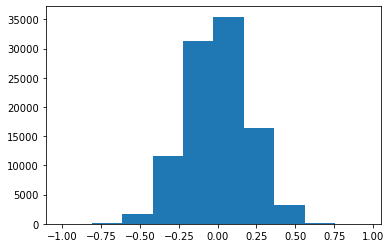

In [5]:
plt.hist(wgn)

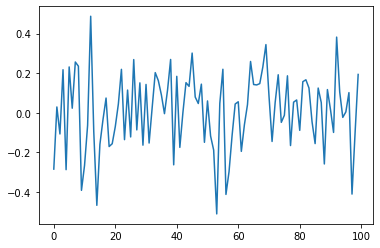

In [6]:
plt.plot(wgn[:100])

## Create ARIMA(0,1,1) model with drift

In [7]:
x = np.zeros(T)
for i in range(1, T):
    x[i] =  x[i-1] + wgn[i] + theta*wgn[i-1] + mu

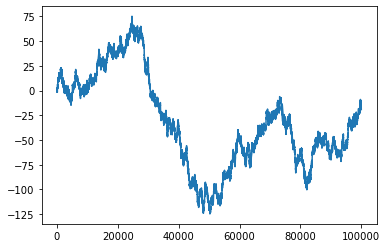

In [8]:
plt.plot(x)

## Compute integrated series

In [9]:
z = np.diff(x)

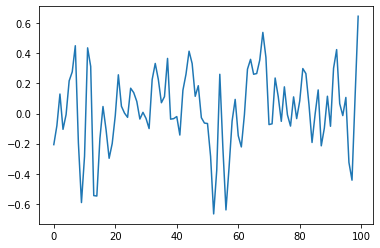

In [10]:
plt.plot(z[:100])

## Compute 1st and 2nd order stats

In [11]:
print(f"sample mean: {np.mean(z)}, theoretcial mean: {mu}")
print(f"sample variance: {np.var(z)}, theoretcial variance: {(1+theta**2)*sigma_eps**2}")

sample mean: -0.00019222189954472838, theoretcial mean: 0.001
sample variance: 0.06760123626574374, theoretcial variance: 0.0677777777777778


In [12]:
R = np.correlate(z[:1000], z[:1000], mode='full')/1000
R = R[int(R.size/2):]

<StemContainer object of 3 artists>

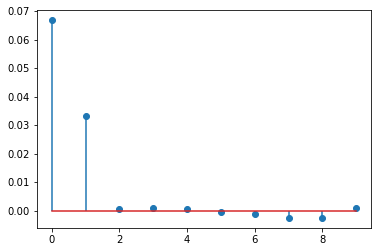

In [13]:
plt.stem(R[:10])

In [14]:
print(f"sample R[0] = {R[0]}, theoretical R[0] = {(1+theta**2)*sigma_eps**2}")
print(f"sample R[1] = {R[1]}, theoretical R[1] = {theta*sigma_eps**2}")
print(f"sample R[2] = {R[2]}, theoretical R[2] = {0}") 

sample R[0] = 0.06676875465191168, theoretical R[0] = 0.0677777777777778
sample R[1] = 0.033151161622890384, theoretical R[1] = 0.03333333333333334
sample R[2] = 0.0005493320451066362, theoretical R[2] = 0


# compute the NLL of z

In [15]:
cov_z = np.zeros((100, 100))
for i in range(100):
    for j in range(i,100):
        cov_z[i,j]= R[j-i]
        cov_z[j,i]= R[j-i]

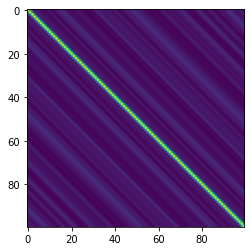

In [16]:
plt.imshow(cov_z)

In [17]:
mu_z = np.ones(100)*np.mean(z)

In [18]:
mvn = multivariate_normal(mean=mu_z, cov=cov_z)

In [19]:
NLL_train = -np.log(mvn.pdf(z[:100]))
NLL_test = -np.log(mvn.pdf(z[200:300]))

In [20]:
print(f"NLL train: {NLL_train}, NLL test: {NLL_test}")

NLL train: -21.949937218138295, NLL test: -20.67298840330495
